<a href="https://colab.research.google.com/github/brunomoneymetrics/exploratory-statistical-econometrics/blob/main/Airbnb_Greater_Manchester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados do Airbnb – Greater Manchester, England, United Kingdom


Este conjunto de dados apresenta informações sobre a atividade dos anúncios e as principais métricas do Airbnb na cidade de Greater Manchester, England, United Kingdom referentes a 24 June, 2025.

Os dados podem ser acessados diretamente no portal oficial do projeto Inside Airbnb, disponível no link: https://insideairbnb.com/get-the-data/

## Carregando as bibliotecas necessárias e o conjunto de dados

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
df = pd.read_csv('/content/GreaterManchester.csv')

df.head()

id                                 name  host_id  host_name  \
0  157612   New attic space/single & Dble room   757016   Margaret   
1  283495      En-suite room in detached house  1476718     Alison   
2  310742  Nice room 10 minutes walk from town  1603652  Francisca   
3  332580  **ELEGANT STAY** CENTRAL MANCHESTER  1694961      Alain   
4  360142   Light double room next to bathroom  1821587       Ekua   

  neighbourhood_group        neighbourhood   latitude  longitude  \
0             Salford     Salford District  53.501530  -2.262490   
1            Rochdale    Rochdale District  53.562710  -2.218240   
2          Manchester  Ancoats and Clayton  53.484110  -2.229190   
3          Manchester          City Centre  53.480172  -2.232849   
4          Manchester            Moss Side  53.454660  -2.235420   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   45.0               2                168  2025-06-16   
1     Private room   75.0             100                 10  2018-08-05   
2     Private room   38.0             180                 65  2022-05-02   
3     Private room   45.0               2                351  2025-06-20   
4     Private room   46.0               3                 48  2024-12-13   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.03                               1                58   
1               0.08                               1               306   
2               0.40                               1               178   
3               2.26                               4                 6   
4               0.30                               2               356   

   number_of_reviews_ltm  license  
0                     14      NaN  
1                      0      NaN  
2                      0      NaN  
3                     12      NaN  
4                      1      NaN

## Visão geral dos dados, limpeza e tratamento dos dados

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7327 entries, 0 to 7326
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7327 non-null   int64  
 1   name                            7327 non-null   object 
 2   host_id                         7327 non-null   int64  
 3   host_name                       7037 non-null   object 
 4   neighbourhood_group             7327 non-null   object 
 5   neighbourhood                   7327 non-null   object 
 6   latitude                        7327 non-null   float64
 7   longitude                       7327 non-null   float64
 8   room_type                       7327 non-null   object 
 9   price                           6637 non-null   float64
 10  minimum_nights                  7327 non-null   int64  
 11  number_of_reviews               7327 non-null   int64  
 12  last_review                     59

In [69]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                          290
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              690
minimum_nights                       0
number_of_reviews                    0
last_review                       1403
reviews_per_month                 1403
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7327
dtype: int64

In [70]:
df.shape

(7327, 18)

### Dicionário de dados


* id : Identificador único do anúncio (listing) no Airbnb. Cada anúncio possui um número exclusivo.


* name : Nome ou título do anúncio criado pelo anfitrião (ex.: "Aconchegante apartamento no centro").
* host_id	: Identificador único do anfitrião (host). Um mesmo anfitrião pode ter múltiplos anúncios.

* host_name: Nome do anfitrião. Pode ser o primeiro nome, apelido ou nome fantasia cadastrado. Há 290 valores vazios nessa coluna
* neighbourhood_group: Agrupamento geográfico de bairros em uma região maior.
* neighbourhood: Bairro específico em que o imóvel está localizado.
* latitude: Coordenada geográfica de latitude do anúncio
* longitude: Coordenada geográfica de longitude do anúncio
* room_type: Tipo de acomodação oferecida
* price: Preço da diária do anúncio (em euros). Nessa coluna há	690 valores nulos, o que pode ser um problema já que é um recurso potencial de resposta para um modelo.
* minimum_nights: úmero mínimo de noites exigido para reservar a acomodação.
* number_of_reviews: Quantidade total de avaliações (reviews) recebidas pelo anúncio
* last_review: Data da última avaliação feita por um hóspede
* reviews_per_month: Número médio de avaliações recebidas por mês
* calculated_host_listings_count: Quantidade de anúncios ativos que pertencem ao mesmo anfitrião.
* availability_365: Número de dias em que o anúncio está disponível para reserva em um ano (0 a 365)
* number_of_reviews_ltm: Número de avaliações recebidas nos últimos 12 meses
* license :Informação sobre a licença de operação do imóvel. Colunsa sem valores

In [71]:
len(df)

7327

In [72]:
df.shape[0]

7327

### Avaliando Valores Nulos

A análise e a ciência de dados podem ser entendidas como um processo de desenvolvimento de decisões práticas a partir das informações extraídas dos dados. Esse processo, de acordo com a https://connect.informs.org/analytics/home, contempla três níveis principais de análise: descritiva, preditiva e prescritiva.

Ao lidarmos com dados do mundo real, é fundamental lembrar que eles raramente chegam “limpos”: geralmente apresentam inconsistências, ruídos e, sobretudo, valores ausentes. Esses valores podem surgir por diferentes motivos e, antes de qualquer tratamento, é essencial compreender por que eles estão ausentes.

De forma geral, existem três mecanismos principais que explicam o surgimento de valores ausentes:

1. Ausência completamente aleatória (MCAR – Missing Completely At Random)

Nesse caso, a probabilidade de ausência não está relacionada a nenhuma outra informação, observada ou não. Em outras palavras, os dados faltam sem motivo específico, pode ser um erro de registro, falha de sistema ou descuido humano.
Exemplo: a variável price (preço da diária do anúncio) no conjunto de dados que estamos trabalhando apresenta cerca de 690 valores ausentes. Não há um fator específico que explique a ausência dessa informação, que, paradoxalmente, é o coração do negócio da plataforma.


2. Ausência ao acaso (MAR – Missing At Random)

Aqui, a ausência está relacionada a outras variáveis observadas. Ou seja, a falta de informação segue um padrão ligado a características conhecidas do conjunto de dados.
Exemplo: a variável last_review (data da última avaliação feita por um hóspede). Avaliações de clientes tendem a estar ausentes com maior frequência, pois as pessoas costumam avaliar produtos apenas quando possuem opiniões fortes (muito boas ou muito ruins).Esse tipo de ausência é, no entanto, informativo, pois o próprio padrão de dados ausentes já transmite informação relevante. Entretanto, essa ausência pode induzir um viés significativo na construção de um modelo preditivo, uma vez que os dados tendem a ser polarizados, com poucos valores intermediários na escala de avaliação.


3. Ausência não aleatória (MNAR – Missing Not At Random)

Esse mecanismo ocorre quando a probabilidade de ausência depende do próprio valor faltante ou de fatores não observados.
Exemplo: a variável license (informação sobre a licença de operação do imóvel). Quando está ausente, isso pode refletir a própria inexistência da licença naquele local, ou seja, a ausência não é apenas técnica, mas reflete a realidade do dado.

Como lidar com valores ausentes?

A resposta depende do objetivo da análise:

* Análise descritiva: em muitos casos, é possível trabalhar apenas com os dados completos, desde que se registre e justifique a ausência de informações importantes.

* Modelos preditivos: nesse contexto, o tratamento dos valores ausentes é uma etapa crítica do pré-processamento. Se negligenciado, pode comprometer a qualidade e a precisão das previsões.

Na prática, recorremos a métodos de imputação, substituindo os valores ausentes por estimativas derivadas dos próprios dados. A imputação é amplamente estudada na literatura estatística, mas no contexto de métodos inferência, mas, em modelos preditivos, estamos preocupados com a precisão das previsões. Alguns poucos algoritmos, especialmente técnicas baseadas em árvores, podem lidar especificamente com valores ausentes. Entretanto, muitos outros exigem que o analista realize testes com diferentes técnicas de imputação, já que não existe um processo único, linear ou universal, como apresentado em muitos notebooks de análise dados.
Uma técnica bastante popular é a imputação por K-vizinhos mais próximos (KNN). Nesse método, uma nova amostra com valor ausente é preenchida a partir da média dos vizinhos mais “próximos” encontrados no conjunto de treinamento.

Para aprofundar o tema, recomendo:
 * https://jmlr.org/beta/papers/v8/saar-tsechansky07a.html
 * https://pubmed.ncbi.nlm.nih.gov/20638252/.
 * Statistical Analysis with Missing Data – Little & Rubin (3ª ed., 2019)
 * Flexible Imputation of Missing Data – Stef van Buuren (2ª ed., 2018)
 * A Review of Missing Data Handling Methods in Machine Learning – Jerez et al. (2010)

In [73]:
missing_values = df.isnull().sum()

missing_values_percent = (missing_values / df.shape[0] ) * 100

missing_df = pd.DataFrame(missing_values_percent)

missing_df.reset_index(inplace= True)

missing_df.rename(columns={'index': 'Coluna', 0: 'Contagem (%)'}, inplace= True)

In [74]:
# Percentual de valores ausentes por coluna
print(missing_df[missing_df['Contagem (%)'] != 0.0])

               Coluna  Contagem (%)
3           host_name      3.957964
9               price      9.417224
12        last_review     19.148355
13  reviews_per_month     19.148355
17            license    100.000000


In [75]:
print(df[['last_review', 'reviews_per_month','availability_365','number_of_reviews']].head())

  last_review  reviews_per_month  availability_365  number_of_reviews
0  2025-06-16               1.03                58                168
1  2018-08-05               0.08               306                 10
2  2022-05-02               0.40               178                 65
3  2025-06-20               2.26                 6                351
4  2024-12-13               0.30               356                 48


In [76]:
# Olhando os valores nulos mais de perto.
df[df['reviews_per_month'].isnull()]

id                                               name  \
33                2400936                  5 bed house close to Uni. Sleep 7   
52                4049632     Hidden Gem Located In Worsley, Seculded, Quiet   
109               8560806                  Premier Suites, One bed Apartment   
121               9249626                 Double room in lovely period house   
125               9489085                                 twin room 2 people   
187              14158030                          Southern view double room   
215              15393020            Student Accommodation near UOM! £134/wk   
260              17835386                  4 bed house to let in Fallowfield   
297              19246038                   Quaint room close to city centre   
307              19557269                              City centre apartment   
343              21564259  Town heywood bury Rochdale Middleton & Manchester   
344              21605534           Modern Private Flat close to City Centre   
406              24814482                                    Overnight Stays   
409              25013633         Well Located Large Double Room with a View   
415              25393644                  Only Exclusive Penthouse - Dreamy   
444              27222554                               home stay Manchester   
467              28096547                       Greater Manchester Apartment   
476              28574462                                      Suite Space 2   
483              28754470                                Prestwich Townhouse   
505              29524606  Comfortable Double room, Manchester with parki...   
506              29524869  Twin Room, Manchester with Free parking and br...   
515              29756595                       Stylish Duplex with En-Suite   
517              29885448                                 Manchester central   
574              31806622                                   Mingze Apartment   
582              31999041                                      Mitford place   
584              32083572       Spacious room, right next to Old Trafford!!!   
655              34447224                       1-Bed Canal Flat Near Centre   
661              34601279        Double Room with Shared Bathroom in Salford   
664              34649867                                        BED 4 NIGHT   
676              35008923   Business Travel House 3 Bedrooms Near Media City   
678              35081679    Spacious 3 Bedroom House For Events & Functions   
684              35447464  The Mitre Hotel- Studio Apartment (Adult only ...   
696              35707315    Full House 3 Bedroom House close to city centre   
699              35852894  Very large sofabed in quite and large livingroom.   
704              35983664        Single room to rent -monthly only but ask-M   
709              36190266         Low Priced Double Bedroom Near City Centre   
763              37563404         Spacious 5 bed family house great location   
774              37978760                         Oakfield Lodge Guest House   
776              38018186                   ROOM NEAR Manchester City Centre   
781              38181882     Cosy, Large, Shared Accommodation Near Man Utd   
806              38836899       3 bedroom flat for students or professionals   
836              39412101              Chorlton Shared - Professional Shared   
886              40637385  Modern, colourful and light 2 bed duplex apart...   
902              41128119  Private room in a prime location for Mancheste...   
916              41337166                                       Tabley House   
917              41343549        Cozy place near takeaways and supermarkets.   
932              41905616             Mirey Lane Cottage in a lovely village   
938              42104395                      One double Bedroom in a House   
940              42135440                                  A Convenient Home   
962              429262

Como o subconjunto de dados ausentes da coluna reviews_per_month contém muitas entradas com informações potencialmente úteis para uma análise descritiva e esse recurso pode ser relevante em alguns contextos, optarei por imputar os valores ausentes com **0 (zero)** para indicar a ausência de avaliações.

In [77]:
# Imputando valores nulos com zero
df.fillna({'last_review': 0, 'reviews_per_month': 0}, inplace=True)

In [78]:
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                          290
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              690
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7327
dtype: int64


In [79]:
# Removendo colunas que não agregam informação

df.drop(columns= ['host_name','license'], inplace= True)

In [80]:
# Olhando as entradas com preço nulo mais de perto
pd.options.display.max_rows = None
df[df['price'].isnull()]

id                                               name  \
22                1864263  Nice Room. Quiet Houseshare. Near M60 & Train ...   
24                1998884                  Nice single room, close to center   
34                2416749                                Up Market Townhouse   
37                2824525            Manchester Centre, ensuite room. Quiet.   
40                3098021  Lovely 2 Br Flat 5 min to City Centre With Par...   
56                4230825                   Double room in modern house. New   
58                4295770               Excellent room at Excellent location   
68                5270940     MANCHESTER - Beautiful property sleeps upto 20   
97                7472592           Urban oasis close to tram and bus routes   
98                7544738                   North Manchester-1 Bed Apartment   
105               8282692                                      Garden studio   
108               8555634                   Cosy simple room close to center   
113               8918168                       Modern Hulme Apartment (M15)   
129               9662753                          Modern Elegant Town House   
130               9837625                    City centre "ARNDALE" apartment   
133              10093023     Heaton park, new room/ensuite, private, metro.   
162              12581190                      Spacious and homely apartment   
163              12690246   Terraced house South Manchester\nhouse number 19   
165              12760398                        Brand New Refurbished House   
169              12938701                    Manchester from the countryside   
174              13408025                       Private Room in shared house   
176              13694897                   Media City UK Single Room - 私人浴室   
184              14067486  5mins walk to shops buses, train, into city ce...   
197              14630639                  Public transport on your doorstep   
204              14760180       Rm3 EgertonArms Hotel just 500m to Deansgate   
206              14760590             Rm4 EgertonArms just 500m to Deansgate   
240              16815895   LUXURY 2BR Salford Quays, MUTD, Media City & BBC   
243              16879520    *Large Garden-View Room Near Manchester Airport   
258              17715530                                    Brand new House   
264              18004305          *COMFORTABLE, BRIGHT AND AIRY DOUBLE ROOM   
265              18004541                                   *Northenden Mews   
272              18158934  Extremely Central Apartment With Character*2 b...   
276              18213344             BEAUTIFUL, BRIGHT AND AIRY DOUBLE ROOM   
286              18730792                            Private bedroom in Bury   
304              19503854           Nice cosy double bedroom near Media City   
306              19540248  Unique and stunning detached house in Chorlton...   
310              20013934  Luxurious Manchester City Centre Home With Par...   
322              20493072       2 Car Driveway! Close to City Beautiful Home   
328              20997170           Double Bedroom next to Manchester Center   
330              21075919                                 Hollybrook Cottage   
363              22247648  Unique Home in Northenden/8 guests\n\n\nUrban ...   
365              22410426  Big 6 bed house,4 bathroom- Families & Contrac...   
366              22467299      Cozy Double Bedroom next to Manchester Center   
371              22696592                                     The Green Room   
374              22768803         Stylish, Chorlton duplex with free parking   
381              23268393                                     CAMINADA HOUSE   
392              24144685                                       Herne street   
398              24364236        En-suite room near university of Manchester   
401              24713545     Stylish 2-Bed Flat in a Converted Pub Sleeps 4   
405              247941

<Axes: xlabel='price'>

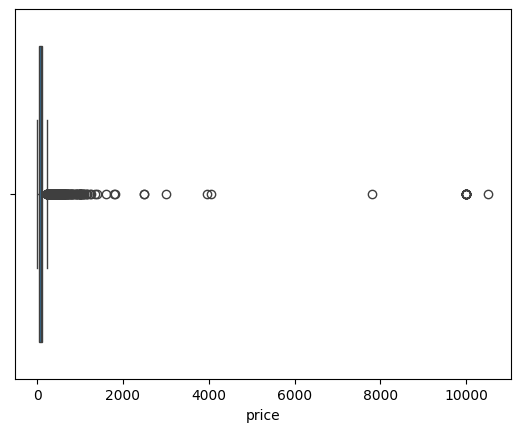

In [81]:
sns.boxplot(data= df, x='price')

Há valores muitos altos que distorcem a distribuição.

In [82]:
# Criando um outro dataset sem os valores ausentes dos preços

df_analysis = df.dropna().copy()

In [83]:
df_analysis.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [84]:
df_analysis.shape

(6637, 16)

### Avaliando duplicatas

In [85]:
df_analysis['id'].duplicated().sum()

np.int64(0)

Não há valores duplicados.
Ps.: Consulte o dicionário de dados

### Avaliando integridade dos dados categoricos

In [86]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6637 entries, 0 to 7326
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6637 non-null   int64  
 1   name                            6637 non-null   object 
 2   host_id                         6637 non-null   int64  
 3   neighbourhood_group             6637 non-null   object 
 4   neighbourhood                   6637 non-null   object 
 5   latitude                        6637 non-null   float64
 6   longitude                       6637 non-null   float64
 7   room_type                       6637 non-null   object 
 8   price                           6637 non-null   float64
 9   minimum_nights                  6637 non-null   int64  
 10  number_of_reviews               6637 non-null   int64  
 11  last_review                     6637 non-null   object 
 12  reviews_per_month               6637 no

In [87]:
df_analysis['neighbourhood_group'].value_counts().shape


(10,)

In [88]:
len(df_analysis['neighbourhood_group'].unique())

10

Aqui, verifico se a contagem de valores do agrupamento de bairros coincide com os valores únicos desse mesmo grupo. O objetivo é identificar possíveis inconsistências de digitação que possam comprometer a integridade da análise.

As células seguintes seguem a mesma lógica, aplicando o mesmo procedimento de verificação para garantir a consistência dos dados.

In [89]:
df_analysis['neighbourhood'].value_counts().shape

(41,)

In [90]:
len(df_analysis['neighbourhood'].unique())

41

In [91]:
df_analysis['room_type'].value_counts()

room_type
Entire home/apt    4430
Private room       2173
Shared room          34
Name: count, dtype: int64

In [92]:
df_analysis['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

## Análisando preço



In [93]:
df_analysis['price'].describe()

count     6637.000000
mean       132.134398
std        486.084214
min          9.000000
25%         50.000000
50%         86.000000
75%        125.000000
max      10515.000000
Name: price, dtype: float64

In [94]:
df_analysis['price'].groupby(df_analysis['neighbourhood_group']).describe()

count        mean          std   min   25%   50%  \
neighbourhood_group                                                      
Bolton                238.0   97.827731   110.794864  19.0  42.0  73.0   
Bury                  207.0  133.328502   163.414620  21.0  56.0  86.0   
Manchester           2961.0  110.950017   115.360830  13.0  51.0  91.0   
Oldham                270.0  244.607407  1201.049616  19.0  49.0  83.5   
Rochdale              156.0  233.365385  1129.568088  20.0  46.5  68.0   
Salford              1289.0  106.435221   152.872813   9.0  54.0  85.0   
Stockport             377.0  166.368700   731.752563  24.0  54.0  85.0   
Tameside              246.0  268.512195  1347.883837  17.0  36.0  65.5   
Trafford              650.0  147.567692   472.677094  22.0  51.0  81.5   
Wigan                 243.0  136.761317   643.239959  16.0  54.0  78.0   

                        75%      max  
neighbourhood_group                   
Bolton               109.00   1014.0  
Bury                 137.00   1151.0  
Manchester           134.00   3000.0  
Oldham               111.75   9999.0  
Rochdale             118.25   9999.0  
Salford              121.00   3950.0  
Stockport            120.00   9999.0  
Tameside             100.00   9999.0  
Trafford             130.75  10515.0  
Wigan                105.50   9999.0

In [95]:
df_analysis['price'].groupby(df_analysis['neighbourhood']).describe()


count        mean          std   min    25%  \
neighbourhood                                                                   
Ancoats and Clayton               516.0  125.986434    93.439092  13.0  79.50   
Ardwick                           102.0   89.901961    61.718542  23.0  48.50   
Baguley                            15.0   81.466667    38.860311  29.0  57.00   
Bolton District                   238.0   97.827731   110.794864  19.0  42.00   
Bradford                          222.0  107.027027    65.631007  19.0  60.25   
Brooklands                         15.0  100.800000    36.610303  36.0  72.00   
Burnage                            23.0  117.347826    95.224428  30.0  41.00   
Bury District                     207.0  133.328502   163.414620  21.0  56.00   
Charlestown                        34.0   85.911765    89.067345  26.0  29.00   
Cheetham                          105.0   98.238095    77.761782  26.0  53.00   
Chorlton                           63.0  105.777778   145.431332  25.0  53.00   
Chorlton Park                      46.0  102.391304    87.960718  26.0  51.25   
City Centre                       446.0  146.383408    99.734450  21.0  97.25   
Crumpsall                          58.0  111.913793   135.394976  22.0  49.75   
Didsbury East                      34.0   89.205882    59.288600  32.0  43.50   
Didsbury West                      66.0  101.484848    82.884394  29.0  66.25   
Fallowfield                        66.0   88.969697    72.201634  22.0  43.25   
Gorton North                       52.0   91.346154   151.873643  19.0  27.00   
Gorton South                       62.0  109.838710   186.851321  18.0  35.00   
Harpurhey                          78.0   84.730769    78.933750  22.0  32.25   
Higher Blackley                    25.0  109.760000   104.569068  21.0  35.00   
Hulme                             187.0  123.224599   126.942764  23.0  61.00   
Levenshulme                        74.0   58.324324    42.598511  20.0  32.00   
Longsight                          71.0   70.521127    72.983336  17.0  34.00   
Miles Platting and Newton Heath    93.0  103.924731   106.299642  19.0  41.00   
Moss Side                         120.0  102.216667   273.157516  20.0  35.75   
Moston                             34.0   99.941176    73.938115  22.0  40.75   
Northenden                         44.0  157.318182   269.362794  33.0  53.75   
Old Moat                           45.0   95.266667    56.909977  32.0  51.00   
Oldham District                   270.0  244.607407  1201.049616  19.0  49.00   
Rochdale District                 156.0  233.365385  1129.568088  20.0  46.50   
Rusholme                           71.0   87.873239   106.789503  22.0  38.00   
Salford District                 1289.0  106.435221   152.872813   9.0  54.00   
Sharston                           28.0   90.428571    62.756100  25.0  48.75   
Stockport District                377.0  166.368700   731.752563  24.0  54.00   
Tameside District                 246.0  268.512195  1347.883837  17.0  36.00   
Trafford District                 650.0  147.567692   472.677094  22.0  51.00   
Whalley Range                      88.0   78.795455    73.719125  24.0  36.75   
Wigan District                    243.0  136.761317   643.239959  16.0  54.00   
Withington                         40.0  110.025000   110.265993  26.0  45.75   
Woodhouse Park                     38.0   85.184211    47.188441  30.0  41.00   

                                   50%     75%      max  
neighbourhood                                            
Ancoats and Clayton              110.5  148.00   1072.0  
Ardwick                           66.0  115.75    328.0  
Baguley                           86.0  103.00    165.0  
Bolton District                   73.0  109.00   1014.0  
Bradford                         100.5  133.00    497.0  
Brooklands                       108.0  118.50    184.0  
Burnage                           84.0  179.00    395.0  
Bury District               

Quando plotei o histograma dos preços na seção de avaliação de valores nulos, chamei a atenção para presença de valores extremamente altos para a diária, o que  distorceu a distribuição, tornando impossível compreender como os preços realmente se organizavam. De forma geral, esse tipo de valor em uma amostra de dados é definido como outlier.

Outliers são observações que se encontram excepcionalmente distantes do padrão central dos dados. Sob determinadas premissas, existem definições estatísticas formais para identificá-los. No entanto, mesmo com uma compreensão aprofundada do conjunto de dados, a definição pode ser desafiadora, já que valores que aparentam ser outliers podem, na verdade, representar um subgrupo legítimo da amostra que ainda não foi suficientemente amostrada.

No conjunto de dados em questão, existem diversos preços de diárias que fogem ao padrão, tanto em nível de macro-regiões quanto de bairros. Esses valores podem, ou não, estar associados a imóveis de luxo. Se representarem de fato esse segmento, eles configurariam um subgrupo válido dentro da amostra, o que exigiria, por exemplo, técnicas como reamostragem ou amostragem estratificada para garantir uma representação correta da realidade.

Alguns casos chamam atenção pela intensidade da distorção. Em regiões como Oldham, Rochdale e Tameside, as médias de preços estão próximas entre si, mas significativamente acima das demais áreas e de suas proprias medianas, refletindo o efeito de valores muito altos puxando a média para cima. Além disso, observam-se desvios-padrão elevados ( evidenciando um alto desvio do preço em relçao a média, lembre-se que a  $ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $ ) e valores máximos excepcionalmente fora do padrão, enquanto os quartis (primeiro, segundo e terceiro) permanecem relativamente próximos.

O que fazer nesse caso?

A resposta está em outra pergunta: tais preços são plausiveis para diárias de Airbnb?

Quando uma ou mais amostras são suspeitas de serem outliers, o primeiro passo é verificar se os valores são  válidos. Como eu não trabalho no Airbnb não posso perguntar pro meu chefe, mas posso verificar diretamente no site da empresa.




In [96]:
df_analysis[df_analysis['price'] > 9999]

id                                       name  \
5564  1314441577087374276  Cohost Partners Cozy Flat in Sale Getaway   

        host_id neighbourhood_group      neighbourhood   latitude  longitude  \
5564  501474854            Trafford  Trafford District  53.423637  -2.316936   

            room_type    price  minimum_nights  number_of_reviews last_review  \
5564  Entire home/apt  10515.0               1                  1  2025-02-01   

      reviews_per_month  calculated_host_listings_count  availability_365  \
5564               0.21                               3               322   

      number_of_reviews_ltm  
5564                      1

Como imaginei, tais valores não são plausíveis para o Airbnb, mesmo entre os preços mais altos. O preço da diária da locação abaixo é, na verdade, 194,48 euros:

[Cohost Partners Cozy Flat in Sale Getaway](https://www.airbnb.com.br/rooms/1314441577087374276?_set_bev_on_new_domain=1756093844_EAMDM0MjEzNTIzMj&source_impression_id=p3_1756093847_P3IUjARNJ3Oi-Jjg&check_in=2025-09-12&guests=1&adults=1&check_out=2025-09-14)


Além disso, parece não existirem acomodações classificadas pelo Airbnb como de luxo:  [Ver aqui](https://https://www.airbnb.com.br/s/Greater-Manchester--Reino-Unido/homes?refinement_paths%5B%5D=%2Fhomes&acp_id=caef2fbe-ec44-4355-9f82-01d4c09ef0ca&date_picker_type=calendar&place_id=ChIJsS6I01Sme0gRgYDGISLYxyw&checkin=2025-09-13&checkout=2025-09-14&source=structured_search_input_header&search_type=user_map_move&query=Greater%20Manchester%2C%20Reino%20Unido&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2025-09-01&monthly_length=3&monthly_end_date=2025-12-01&search_mode=regular_search&price_filter_input_type=2&price_filter_num_nights=1&channel=EXPLORE&selected_filter_order%5B%5D=tier_ids%3A2&update_selected_filters=false&tier_ids%5B%5D=2&ne_lat=53.65706714794335&ne_lng=-1.8576581229525004&sw_lat=53.068171396186784&sw_lng=-2.679046921365625&zoom=9.289011726645088&zoom_level=9.289011726645088&search_by_map=true)


Quando ajustamos o aluguel para o último valor do filtro, encontramos valores bastante atípicos, mas ainda assim inferiores aos outliers do conjunto de dados em questão [exceto este chalé](https://www.airbnb.com.br/rooms/1313648905539839881?check_in=2025-09-13&check_out=2025-09-14&search_mode=regular_search&source_impression_id=p3_1756161804_P3ZZ-EmBYuc4cwI-&previous_page_section_name=1000&federated_search_id=099b6dae-facc-4b8d-ad2b-6307c5252baf)

In [97]:
df_analysis['price'].groupby(df_analysis['room_type']).describe()

count        mean         std   min   25%    50%    75%  \
room_type                                                                   
Entire home/apt  4430.0  170.092777  586.827756   9.0  80.0  106.0  147.0   
Private room     2173.0   56.050161  104.062772  13.0  32.0   41.0   56.0   
Shared room        34.0   49.058824   25.761071  17.0  23.0   60.0   69.0   

                     max  
room_type                 
Entire home/apt  10515.0  
Private room      3950.0  
Shared room        120.0

In [33]:
df_analysis[ (df_analysis['price'] > 100)  & (df_analysis['price'] < 200 )]

id                                               name  \
6                  503513  Stylish 2 bed Apt Balcony Nr Coop LiveCity Sta...   
9                  681857                      A perfect Home away from home   
10                 735851                       Manchester-Stockport-Cheadle   
13                1199469               Boutique Mews Cottage, West Didsbury   
16                1241309  ★Glass Roof★Walkable★Full Kitch★Office★Deck★Ga...   
27                2150350                  Fantastic, modern 3 bedroom house   
33                2400936                  5 bed house close to Uni. Sleep 7   
47                3683808                2 King beds, Central city apartment   
48                3710848                     Spacious, cosy and good value.   
52                4049632     Hidden Gem Located In Worsley, Seculded, Quiet   
64                4884152  Hall Moss Farm, charming serviced holiday cott...   
69                5544185         Manchester City Centre 2 Bedroom Apartment   
76                6010502  Bright, Light and Calm Two Bedroom Townhouse, M33   
77                6081027  Pet Friendly Garden Apartment Sale-MCR Tram Links   
92                7057821                                      Rowan Estates   
101               7830452                ❤ The Garden Apartment - Stockport❤   
106               8355521                           The Way Near City Centre   
109               8560806                  Premier Suites, One bed Apartment   
114               9048382      Stunning loft in N QTR ideal base 4 city life   
120               9228916     Spacious Apartment - Heart of Northern Quarter   
139              10539658             Pad 2 - One Bedroom Apartment - Satori   
142              10858191             Heart of Ancoats -  2 bed + Parking :)   
152              11485932                  Bramley 2 Room Plus Kitchen Suite   
153              11505235          Contractor/Family stays FREE parking (7P)   
192              14351034      Charming 4 Bedroom House (Greater Manchester)   
207              14773918  Cosy house+garden | Fab area | Manchester by tram   
208              14798705                 Modern Central Penthouse Apartment   
215              15393020            Student Accommodation near UOM! £134/wk   
229              16214631        Modern 2BR for Contractors and Family Stays   
246              17189540            Luxury Garden Apartment in Didsbury - B   
255              17531050   3-bed near Co-Op Live & Etihad with free parking   
263              17995073          Single Room Salford Quays / 豪华双人卧室 / 싱글 룸   
271              18144761            Luxury Garden Apartment in Didsbury - A   
278              18231306  3BR Contractor House near Wigan, Bolton,Warrin...   
279              18261017                                   Luxury log cabin   
285              18575716                                 The Strawberry (C)   
293              19029071          Luxury City Centre Home by City SuperHost   
302              19482457  Cosy house in good location for exploring ches...   
305              19522328                                 The Strawberry (A)   
316              20320966                        Spacious King Sized Bedroom   
319              20373907   The Egerton Arms for up to 6 (500m to Deansgate)   
323              20581199           Rm5 (for4) EgertonArms 500m to Deansgate   
327              20910508                      ❤️ Romantic Woodland Lodge ❤️   
331              21110107                      Luxury Lodge - By Heaton Park   
339              21464877   Elegant & convenient stay in a historic building   
348              21788083        Pots & Pans Cottage, Saddleworth, Uppermill   
351              21862042     No.72 delightful 3bed Withington/West Didsbury   
352              21908058         Charming, cosy home in leafy Whalley Range   
357              21987596  Spacious bungalow, private/secure garden-sleeps 6   
358              219909

<Axes: >

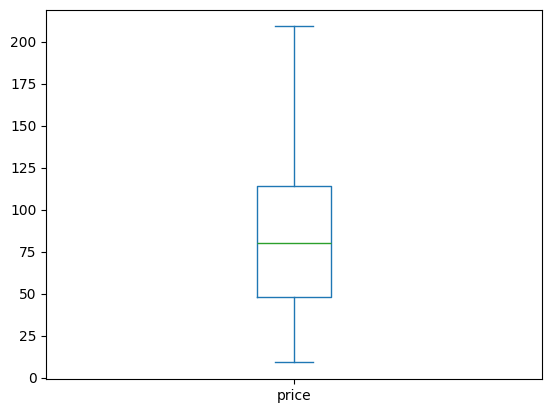

In [34]:
df_analysis[df_analysis['price'] < 210]['price'].plot(kind='box')


In [35]:
df_analysis_normalizado = df_analysis[df_analysis['price'] < 210].copy()
df_analysis_normalizado.shape

(6144, 16)

### Histograma dos preços (todos os anuncios)

Text(0.5, 1.0, 'Histograma dos Preços das Diárias (em €)')

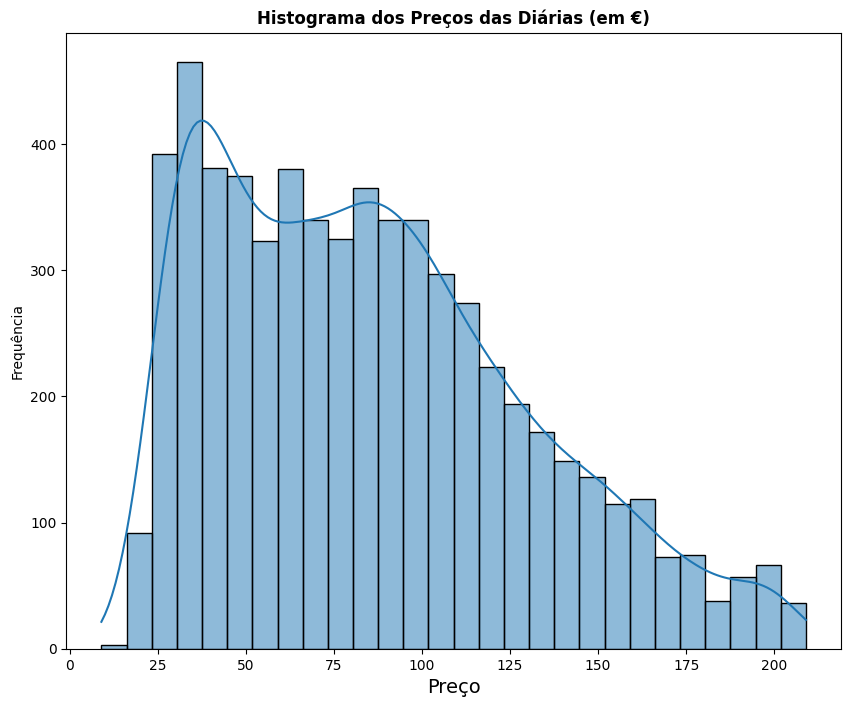

In [36]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df_analysis_normalizado, x='price', kde= True)
plt.xlabel("Preço", fontsize = 14)
plt.ylabel('Frequência')
plt.title("Histograma dos Preços das Diárias (em €)", fontweight='bold')

A assimetria à direita indica que os preços das diárias se concentram em valores menores em toda a região de Greater Manchester. De fato, ao estendermos a faixa de valores, observamos que os preços que se afastam significativamente do intervalo interquartíli podem ser considerados valores atípicos (outliers).


<Axes: xlabel='price'>

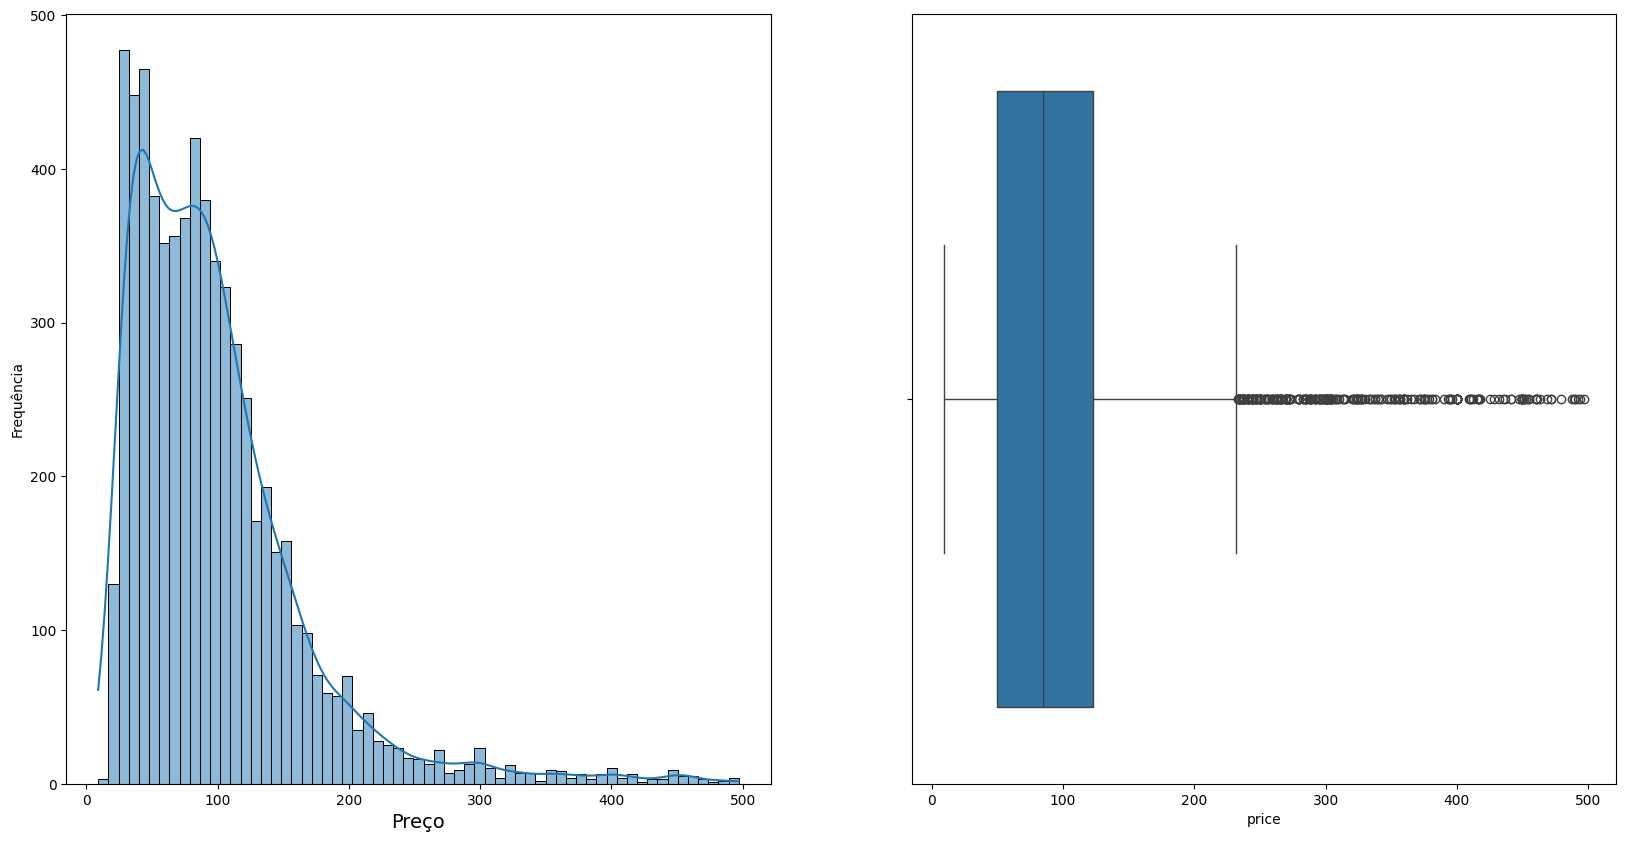

In [37]:
# Menor que 500 euros
temp = df_analysis[df_analysis['price'] < 500].copy()

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)

sns.histplot(data=temp, x='price', kde= True)
plt.xlabel("Preço", fontsize = 14)
plt.ylabel('Frequência')

plt.subplot(1,2,2)

sns.boxplot(data= temp, x='price')

<Axes: xlabel='price'>

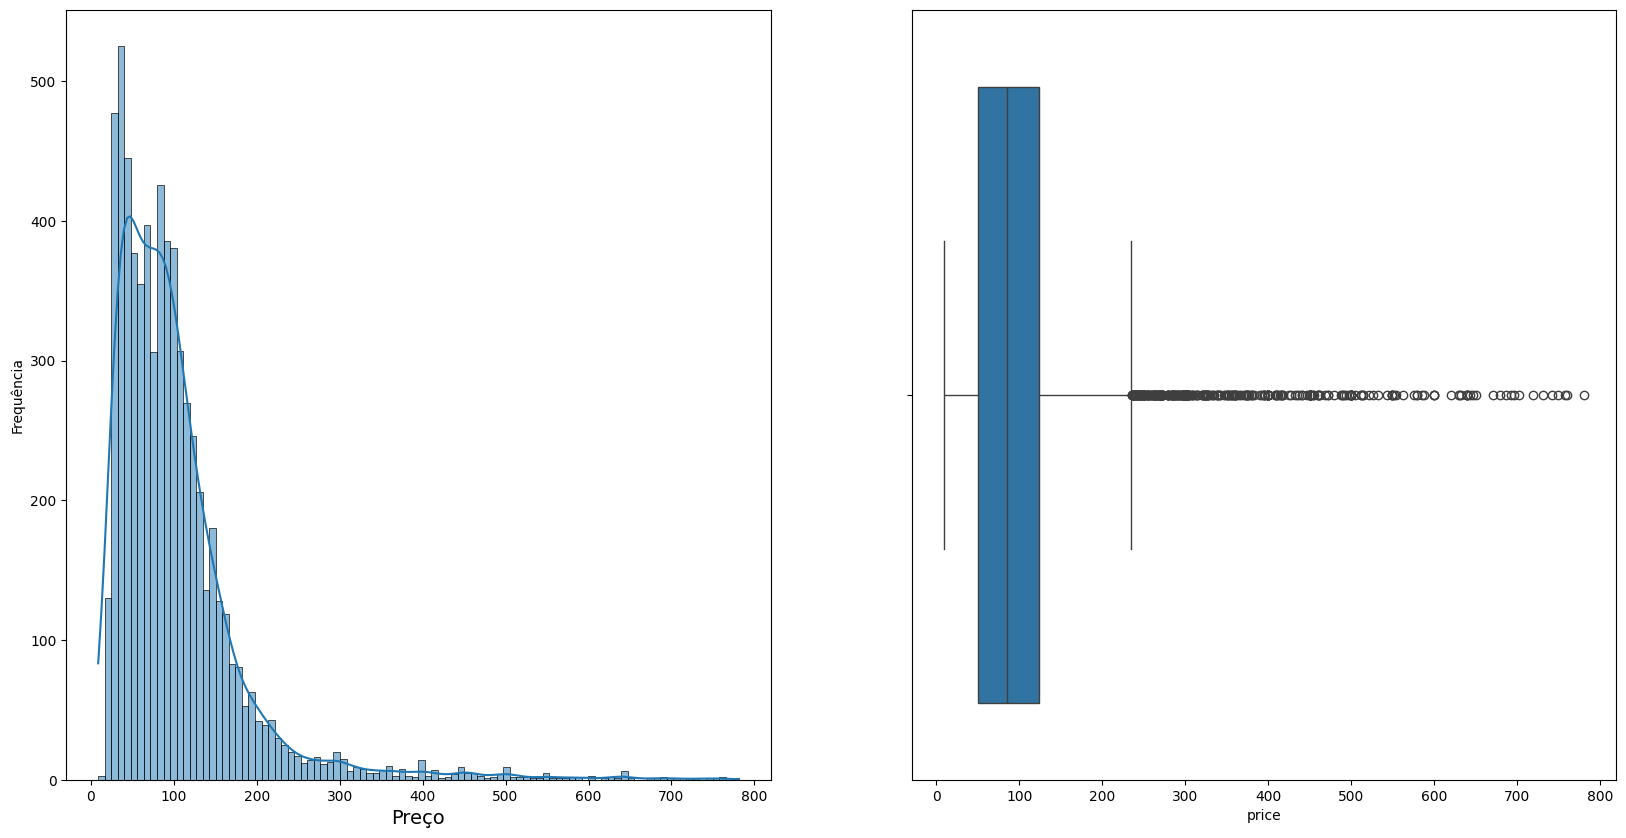

In [38]:
# Menor que 800 euros
temp = df_analysis[df_analysis['price'] < 800].copy()

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)

sns.histplot(data=temp, x='price', kde= True)
plt.xlabel("Preço", fontsize = 14)
plt.ylabel('Frequência')

plt.subplot(1,2,2)

sns.boxplot(data= temp, x='price')

### Distribuição de Preços por Tipo de Quarto

In [39]:
# Resumo das principais estatísticas descritivas
df_analysis_normalizado['price'].groupby(df_analysis_normalizado['room_type']).describe()

count        mean        std   min   25%    50%    75%  \
room_type                                                                  
Entire home/apt  3979.0  106.257602  38.421614   9.0  78.0  100.0  131.0   
Private room     2131.0   47.658846  24.737466  13.0  32.0   40.0   55.0   
Shared room        34.0   49.058824  25.761071  17.0  23.0   60.0   69.0   

                   max  
room_type               
Entire home/apt  209.0  
Private room     204.0  
Shared room      120.0

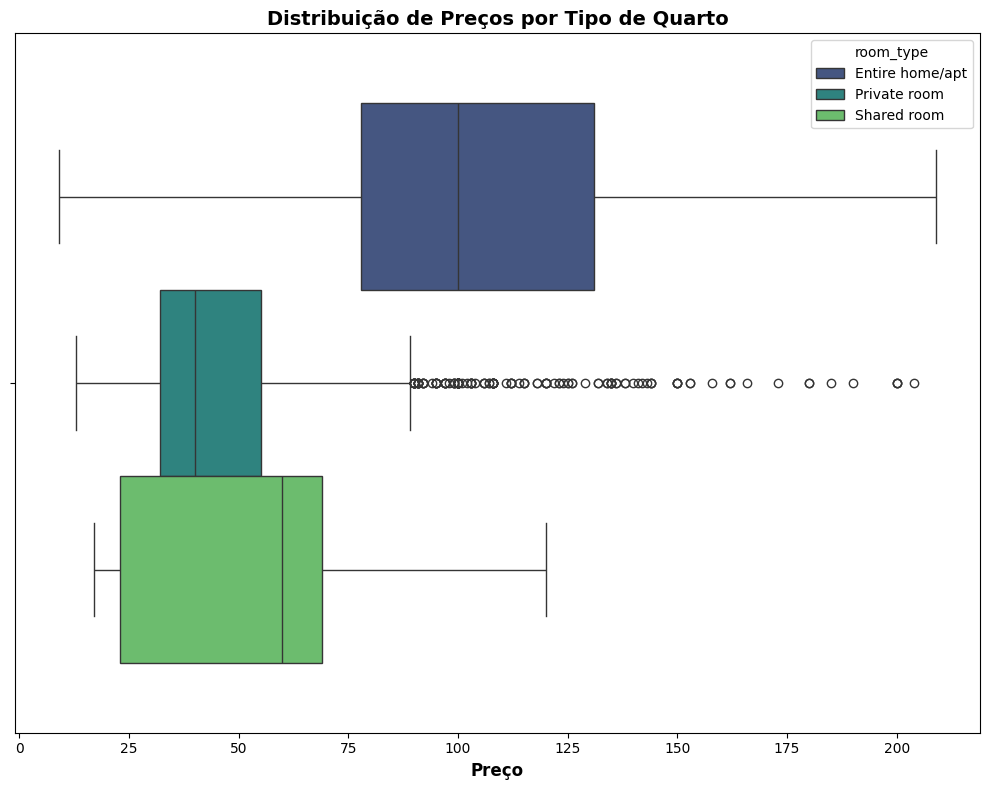

In [40]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=df_analysis_normalizado, x='price', hue='room_type',palette='viridis')
plt.title("Distribuição de Preços por Tipo de Quarto", fontweight='bold', fontsize=14)
plt.xlabel("Preço", fontweight='bold', fontsize =12)
plt.tight_layout()
plt.show()


A exibição de múltiplos boxplots no mesmo gráfico é especialmente valiosa quando comparamos uma mesma variável, como o preço, entre diferentes categorias. As diárias de casas ou apartamentos (**Entire home/apt**) apresentam maior variabilidade, evidenciada pela caixa mais extensa e pelas linhas mais longas. Já os quartos privativos (**Private room**), apesar de reunirem muitas amostras, exibem menor variabilidade, mas com a presença de diversos outliers que podem estar comprimindo a distribuição. Os quartos compartilhados (S**hared room**) mostram um preço mediano superior ao dos quartos privativos, enquanto casas e apartamentos alcançam os maiores valores medianos. Em resumo, é possível concluir que os preços das diárias tendem a ser mais elevados para casas ou apartamentos

In [41]:
# Contagem de cada categoria de quarto
print(df_analysis_normalizado['room_type'].value_counts())

room_type
Entire home/apt    3979
Private room       2131
Shared room          34
Name: count, dtype: int64


In [42]:
df_private_room = df_analysis_normalizado[df_analysis_normalizado['room_type'] == 'Private room'].copy()

<Axes: >

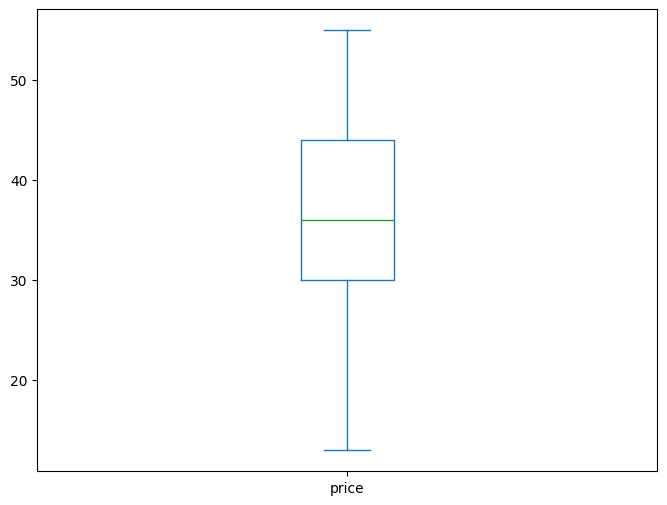

In [43]:
df_private_room[df_private_room['price'] < 56]['price'].plot(kind='box', figsize= (8,6))

In [44]:
df_analysis_normalizado.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

<Axes: xlabel='reviews_per_month', ylabel='price'>

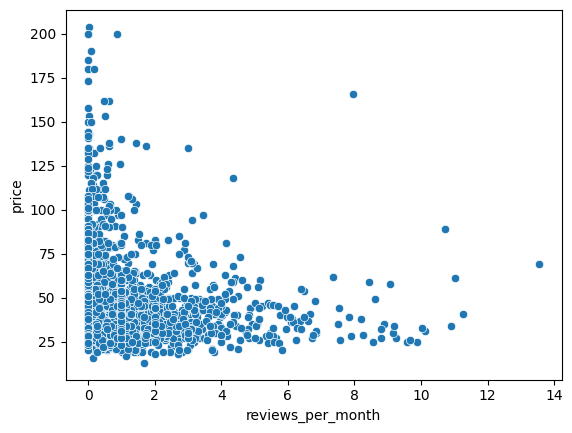

In [45]:
sns.scatterplot(data=df_private_room, x='reviews_per_month', y='price')

In [46]:
df_private_room.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [47]:
def logaritmo(x):
    return np.log(x)

df_private_room['log_price']   = df_private_room['price'].apply(logaritmo)


In [48]:
def logaritmo2(x):
    return np.log(1 + x)
df_private_room['log_reviews_per_month'] =  df_private_room['reviews_per_month'].apply(logaritmo2)

<Axes: xlabel='reviews_per_month', ylabel='log_price'>

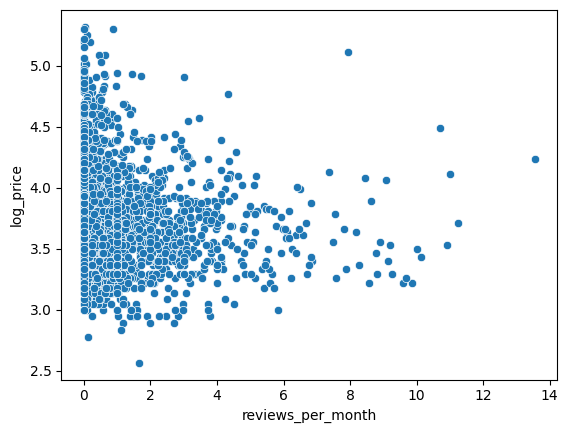

In [49]:
sns.scatterplot(data= df_private_room, x= 'reviews_per_month', y= 'log_price' )

<Axes: xlabel='log_reviews_per_month', ylabel='log_price'>

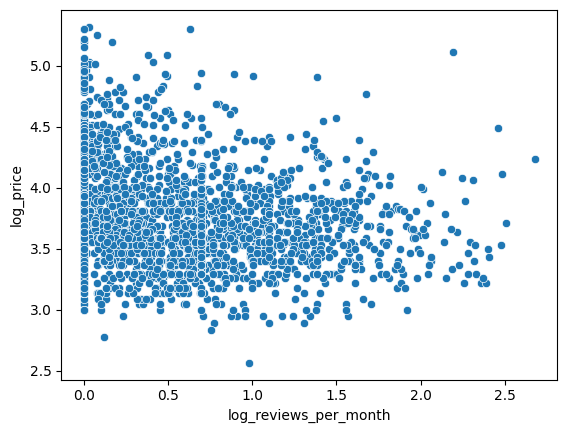

In [50]:
sns.scatterplot(data= df_private_room, x= 'log_reviews_per_month', y= 'log_price' )


In [51]:
df_home = df_analysis_normalizado[df_analysis_normalizado['room_type'] == 'Entire home/apt'].copy()

<Axes: xlabel='reviews_per_month', ylabel='price'>

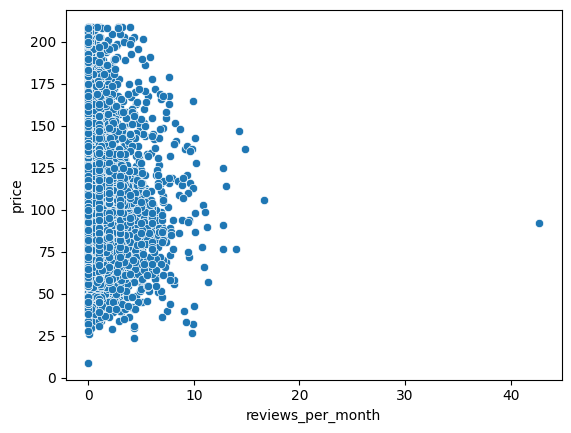

In [52]:
sns.scatterplot(data= df_home, x='reviews_per_month', y='price')


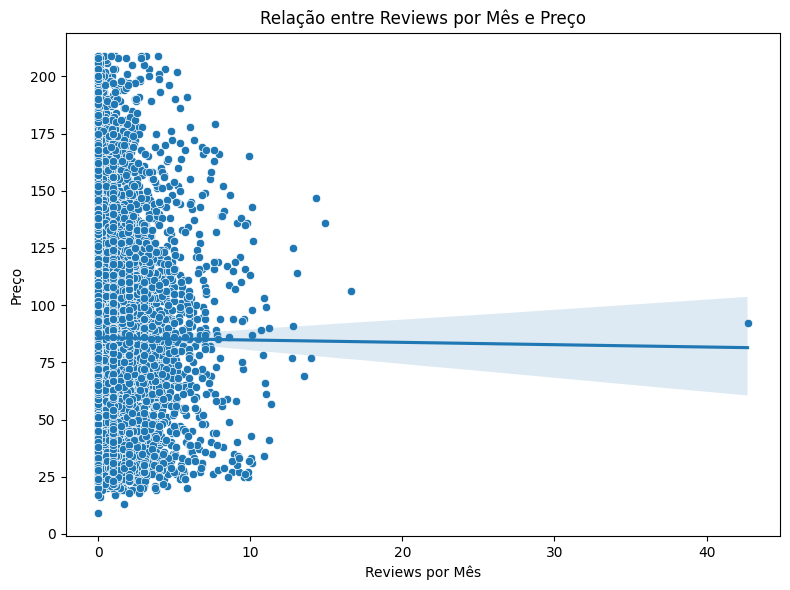

In [53]:
plt.figure(figsize=(8,6))

sns.scatterplot(data= df_analysis_normalizado, x='reviews_per_month', y='price')
sns.regplot(data= df_analysis_normalizado, x='reviews_per_month', y='price', scatter= False)
plt.title("Relação entre Reviews por Mês e Preço")
plt.xlabel("Reviews por Mês")
plt.ylabel("Preço")
plt.tight_layout()
plt.show()

In [54]:
df_analysis_normalizado[['reviews_per_month','price']].corr()

reviews_per_month     price
reviews_per_month           1.000000 -0.004338
price                      -0.004338  1.000000

Interessante essa correlação levimente negativa, mas não existe relação estatisticamente relevante.

 ### Distribuição dos Preços por Grupo de Bairro

In [55]:
df_analysis_normalizado.head()

id                                 name  host_id neighbourhood_group  \
0  157612   New attic space/single & Dble room   757016             Salford   
1  283495      En-suite room in detached house  1476718            Rochdale   
2  310742  Nice room 10 minutes walk from town  1603652          Manchester   
3  332580  **ELEGANT STAY** CENTRAL MANCHESTER  1694961          Manchester   
4  360142   Light double room next to bathroom  1821587          Manchester   

         neighbourhood   latitude  longitude        room_type  price  \
0     Salford District  53.501530  -2.262490  Entire home/apt   45.0   
1    Rochdale District  53.562710  -2.218240     Private room   75.0   
2  Ancoats and Clayton  53.484110  -2.229190     Private room   38.0   
3          City Centre  53.480172  -2.232849     Private room   45.0   
4            Moss Side  53.454660  -2.235420     Private room   46.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                168  2025-06-16               1.03   
1             100                 10  2018-08-05               0.08   
2             180                 65  2022-05-02               0.40   
3               2                351  2025-06-20               2.26   
4               3                 48  2024-12-13               0.30   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               1                58                     14  
1                               1               306                      0  
2                               1               178                      0  
3                               4                 6                     12  
4                               2               356                      1

In [56]:
df_analysis_normalizado['price'].groupby(df_analysis_normalizado['neighbourhood_group']).describe()

count       mean        std   min    25%   50%     75%  \
neighbourhood_group                                                            
Bolton                221.0  73.959276  38.850566  19.0  40.00  69.0   97.00   
Bury                  180.0  86.700000  45.074724  21.0  52.75  79.0  111.25   
Manchester           2747.0  89.911540  46.424596  13.0  48.00  86.0  122.00   
Oldham                245.0  78.428571  39.699589  19.0  47.00  75.0   99.00   
Rochdale              143.0  75.454545  44.493666  20.0  44.00  60.0  100.00   
Salford              1211.0  85.554913  41.811354   9.0  51.00  81.0  112.00   
Stockport             348.0  85.120690  41.237309  24.0  50.00  81.0  110.25   
Tameside              236.0  70.745763  40.639188  17.0  36.00  63.5   99.25   
Trafford              582.0  84.017182  43.961371  22.0  48.00  76.0  110.75   
Wigan                 231.0  79.056277  38.485360  16.0  50.00  75.0  101.50   

                       max  
neighbourhood_group         
Bolton               193.0  
Bury                 209.0  
Manchester           209.0  
Oldham               199.0  
Rochdale             198.0  
Salford              209.0  
Stockport            208.0  
Tameside             198.0  
Trafford             209.0  
Wigan                199.0

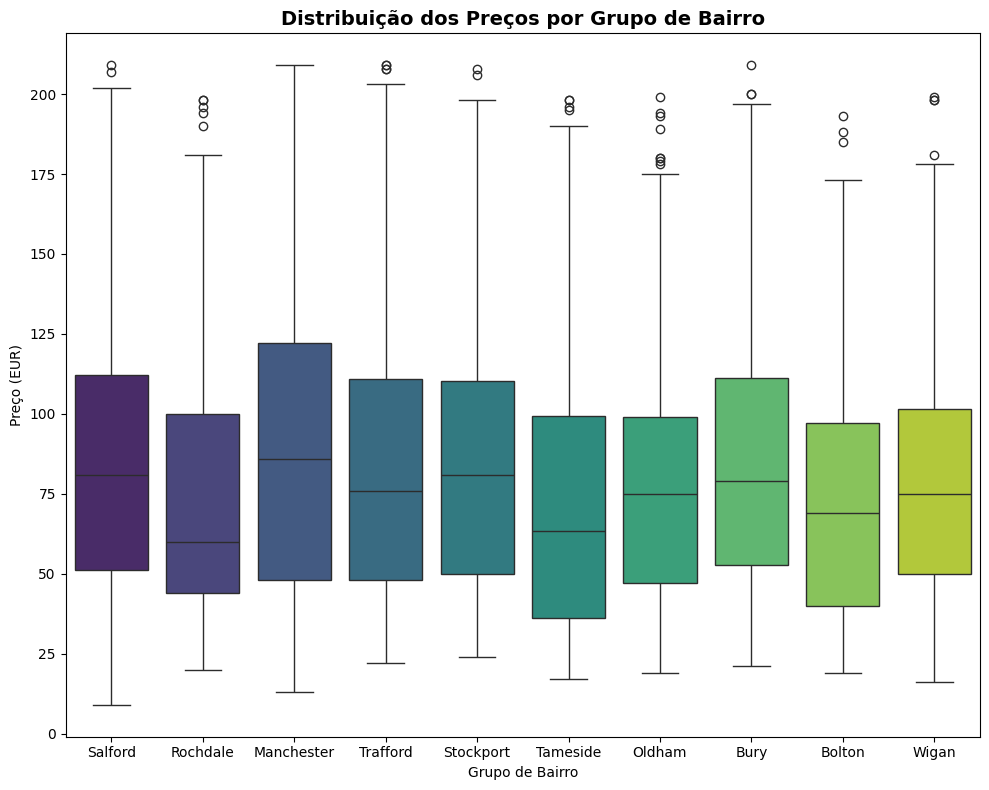

In [57]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=df_analysis_normalizado,
    x='neighbourhood_group',
    y='price',
    hue='neighbourhood_group',
    palette='viridis'
)
plt.title('Distribuição dos Preços por Grupo de Bairro', fontweight='bold', fontsize=14)
plt.xlabel("Grupo de Bairro")
plt.ylabel("Preço (EUR)")
plt.tight_layout()


Vemos que o maior preço mediano é o da região de Manchester e o menor é o da região de Rochdale.

### Distribuição dos Preços por Bairro

In [58]:
df_analysis_normalizado['price'].groupby(df_analysis_normalizado['neighbourhood']).describe().sort_values( by= '50%',ascending= False)

count        mean        std   min    25%  \
neighbourhood                                                                 
City Centre                       397.0  119.667506  37.424676  21.0  95.00   
Brooklands                         15.0  100.800000  36.610303  36.0  72.00   
Ancoats and Clayton               472.0  105.561441  42.709412  13.0  73.00   
Bradford                          211.0   97.388626  47.834145  19.0  58.50   
Hulme                             175.0   98.537143  45.945965  23.0  57.00   
Baguley                            15.0   81.466667  38.860311  29.0  57.00   
Northenden                         40.0   92.200000  44.997550  33.0  50.00   
Didsbury West                      62.0   85.758065  34.651750  29.0  63.75   
Stockport District                348.0   85.120690  41.237309  24.0  50.00   
Old Moat                           43.0   87.534884  43.633402  32.0  50.50   
Salford District                 1211.0   85.554913  41.811354   9.0  51.00   
Bury District                     180.0   86.700000  45.074724  21.0  52.75   
Chorlton Park                      44.0   89.136364  49.207482  26.0  49.75   
Crumpsall                          55.0   87.581818  47.453170  22.0  48.00   
Chorlton                           60.0   83.133333  40.900237  25.0  52.00   
Trafford District                 582.0   84.017182  43.961371  22.0  48.00   
Wigan District                    231.0   79.056277  38.485360  16.0  50.00   
Cheetham                           99.0   83.282828  37.670711  26.0  53.00   
Oldham District                   245.0   78.428571  39.699589  19.0  47.00   
Woodhouse Park                     38.0   85.184211  47.188441  30.0  41.00   
Didsbury East                      32.0   77.843750  38.356653  32.0  43.00   
Withington                         36.0   78.777778  44.322913  26.0  41.75   
Moston                             31.0   83.483871  52.882808  22.0  36.50   
Bolton District                   221.0   73.959276  38.850566  19.0  40.00   
Ardwick                            95.0   77.663158  42.064694  23.0  42.00   
Miles Platting and Newton Heath    85.0   77.870588  45.631492  19.0  41.00   
Burnage                            20.0   89.750000  60.316599  30.0  39.75   
Tameside District                 236.0   70.745763  40.639188  17.0  36.00   
Rusholme                           67.0   66.880597  36.306574  22.0  36.00   
Fallowfield                        59.0   67.847458  36.479476  22.0  40.50   
Sharston                           27.0   82.925926  49.528489  25.0  48.50   
Rochdale District                 143.0   75.454545  44.493666  20.0  44.00   
Harpurhey                          73.0   67.726027  39.955274  22.0  32.00   
Whalley Range                      83.0   64.578313  37.446587  24.0  35.50   
Gorton South                       57.0   64.578947  42.186214  18.0  34.00   
Charlestown                        31.0   62.483871  43.717175  26.0  29.00   
Moss Side                         112.0   68.428571  46.539088  20.0  35.00   
Gorton North                       49.0   64.367347  46.468490  19.0  27.00   
Levenshulme                        73.0   55.630137  35.989392  20.0  32.00   
Higher Blackley                    22.0   79.454545  57.586975  21.0  34.25   
Longsight                          69.0   60.434783  42.046360  17.0  34.00   

                                   50%     75%    max  
neighbourhood                                          
City Centre                      116.0  146.00  208.0  
Brooklands                       108.0  118.50  184.0  
Ancoats and Clayton              105.0  136.00  209.0  
Bradford                          98.0  126.50  207.0  
Hulme                             96.0  129.50  208.0  
Baguley                           86.0  103.00  165.0  
Northenden                        84.5  118.75  209.0  
Didsbury West                     82.5  101.50  198.0  
Stockport District                81.0  110.25  208.0  
Old Moat            

In [59]:
df_analysis_normalizado.groupby(['neighbourhood_group','neighbourhood'])['price'].describe()

count        mean  \
neighbourhood_group neighbourhood                                         
Bolton              Bolton District                   221.0   73.959276   
Bury                Bury District                     180.0   86.700000   
Manchester          Ancoats and Clayton               472.0  105.561441   
                    Ardwick                            95.0   77.663158   
                    Baguley                            15.0   81.466667   
                    Bradford                          211.0   97.388626   
                    Brooklands                         15.0  100.800000   
                    Burnage                            20.0   89.750000   
                    Charlestown                        31.0   62.483871   
                    Cheetham                           99.0   83.282828   
                    Chorlton                           60.0   83.133333   
                    Chorlton Park                      44.0   89.136364   
                    City Centre                       397.0  119.667506   
                    Crumpsall                          55.0   87.581818   
                    Didsbury East                      32.0   77.843750   
                    Didsbury West                      62.0   85.758065   
                    Fallowfield                        59.0   67.847458   
                    Gorton North                       49.0   64.367347   
                    Gorton South                       57.0   64.578947   
                    Harpurhey                          73.0   67.726027   
                    Higher Blackley                    22.0   79.454545   
                    Hulme                             175.0   98.537143   
                    Levenshulme                        73.0   55.630137   
                    Longsight                          69.0   60.434783   
                    Miles Platting and Newton Heath    85.0   77.870588   
                    Moss Side                         112.0   68.428571   
                    Moston                             31.0   83.483871   
                    Northenden                         40.0   92.200000   
                    Old Moat                           43.0   87.534884   
                    Rusholme                           67.0   66.880597   
                    Sharston                           27.0   82.925926   
                    Whalley Range                      83.0   64.578313   
                    Withington                         36.0   78.777778   
                    Woodhouse Park                     38.0   85.184211   
Oldham              Oldham District                   245.0   78.428571   
Rochdale            Rochdale District                 143.0   75.454545   
Salford             Salford District                 1211.0   85.554913   
Stockport           Stockport District                348.0   85.120690   
Tameside            Tameside District                 236.0   70.745763   
Trafford            Trafford District                 582.0   84.017182   
Wigan               Wigan District                    231.0   79.056277   

                                                           std   min    25%  \
neighbourhood_group neighbourhood                                             
Bolton              Bolton District                  38.850566  19.0  40.00   
Bury                Bury District                    45.074724  21.0  52.75   
Manchester          Ancoats and Clayton              42.709412  13.0  73.00   
                    Ardwick                          42.064694  23.0  42.00   
                    Baguley                          38.860311  29.0  57.00   
                    Bradford                         47.834145  19.0  58.50   
                    Brooklands                       36.610303  36.0  72.00   
                    Burnage                          60.316599  30.0  39.75   
                    Charlestown       

o volume de anúncios está  concentrado na cidade de Manchester, principalmente no City Centre e bairros próximos.

<Figure size 1000x800 with 0 Axes>

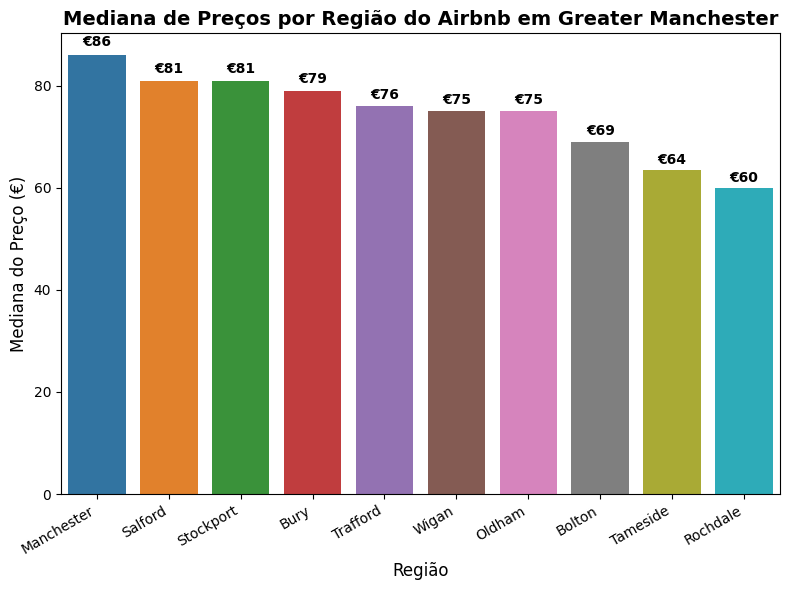

In [98]:
plt.figure(figsize = (10,8))
median_price = df_analysis_normalizado.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=median_price.index, y=median_price.values, hue= median_price.index)
plt.title('Mediana de Preços por Região do Airbnb em Greater Manchester', fontsize=14, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Mediana do Preço (€)', fontsize=12)

plt.xticks(rotation=30, ha='right')


for i, v in enumerate(median_price.values):
    plt.text(i, v + (v*0.02), f"€{v:.0f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Análise Geografica

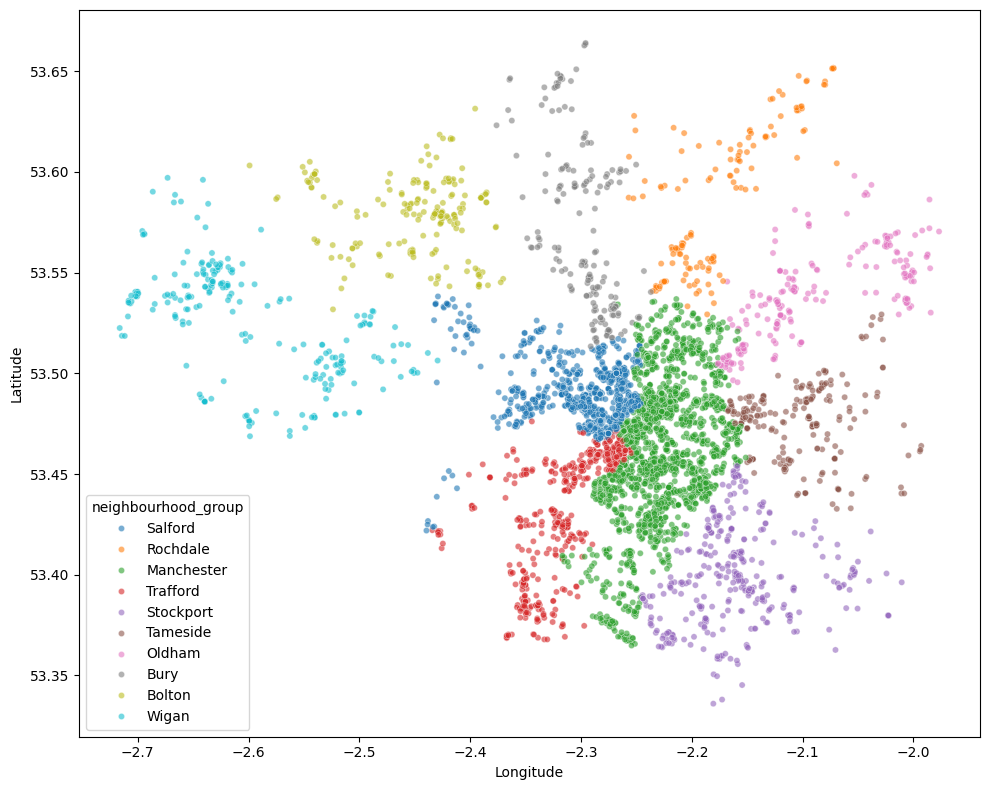

In [63]:
plt.figure(figsize= (10,8))
sns.scatterplot(data=df_analysis_normalizado, x='longitude', y='latitude',hue='neighbourhood_group', alpha=0.6, s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

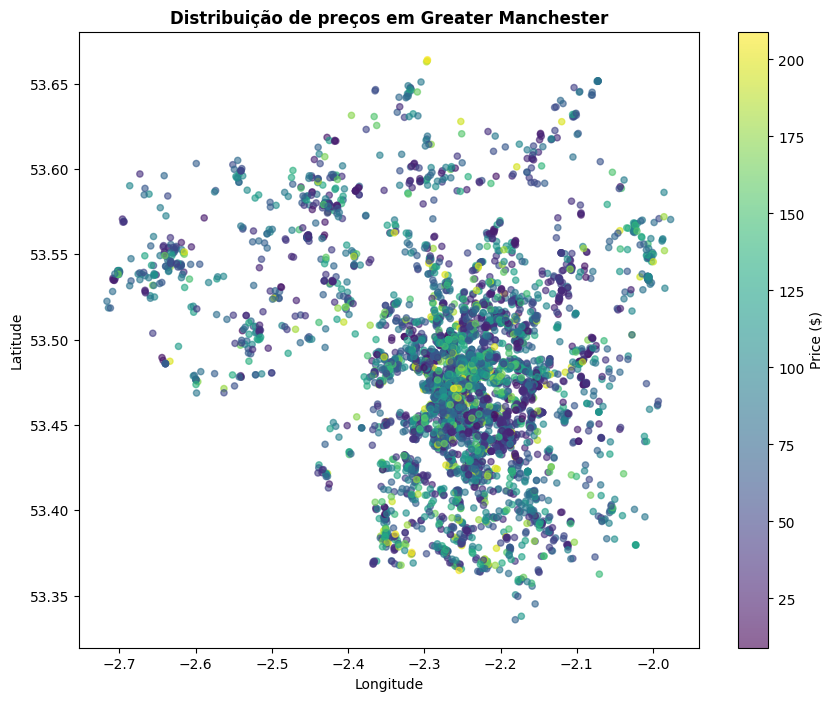

In [101]:
plt.figure(figsize= (10,8))
plt.scatter(df_analysis_normalizado['longitude'], df_analysis_normalizado['latitude'], c=df_analysis_normalizado['price'],
               cmap='viridis', alpha=0.6, s=20)
plt.colorbar(label='Price ($)')
plt.title('Distribuição de preços em Greater Manchester', fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [103]:
median_price = df['price'].median()
most_expensive_borough = df_analysis_normalizado.groupby('neighbourhood_group')['price'].median().idxmax()
most_affordable_borough = df_analysis_normalizado.groupby('neighbourhood_group')['price'].median().idxmin()

print(f"   • Preço mediano dos anúncios: €{median_price:.2f}")
print(f"   • Bairro mais caro: {most_expensive_borough}")
print(f"   • Bairro mais acessível: {most_affordable_borough}")

   • Preço mediano dos anúncios: €86.00
   • Bairro mais caro: Manchester
   • Bairro mais acessível: Rochdale


In [104]:
def analyze_geography(df):
    """Analyze geographical distribution of listings"""

    plt.figure(figsize=(20,15))

    # Subplot 1: Scatter plot of all listings
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=df, x='longitude', y='latitude',
                   hue='neighbourhood_group', alpha=0.6, s=20)
    plt.title('NYC Airbnb Listings by Borough', fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Subplot 2: Price heatmap by location
    plt.subplot(2, 3, 2)
    plt.scatter(df['longitude'], df['latitude'], c=df['price'],
               cmap='viridis', alpha=0.6, s=20)
    plt.colorbar(label='Price ($)')
    plt.title('Price Distribution Across NYC', fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Subplot 3: Listings count by neighbourhood group
    plt.subplot(2, 3, 3)
    borough_counts = df['neighbourhood_group'].value_counts()
    sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set1')
    plt.title('Listings Count by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)

    # Subplot 4: Average price by neighbourhood group
    plt.subplot(2, 3, 4)
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')
    plt.title('Average Price by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)

    # Subplot 5: Room type distribution by borough
    plt.subplot(2, 3, 5)
    room_borough = pd.crosstab(df['neighbourhood_group'], df['room_type'])
    room_borough_pct = room_borough.div(room_borough.sum(axis=1), axis=0) * 100
    sns.heatmap(room_borough_pct, annot=True, cmap='Blues', fmt='.1f')
    plt.title('Room Type Distribution by Borough (%)', fontweight='bold')
    plt.xlabel('Room Type')
    plt.ylabel('Borough')

    # Subplot 6: Availability by borough
    plt.subplot(2, 3, 6)
    sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='Set3')
    plt.title('Availability Distribution by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Days Available per Year')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

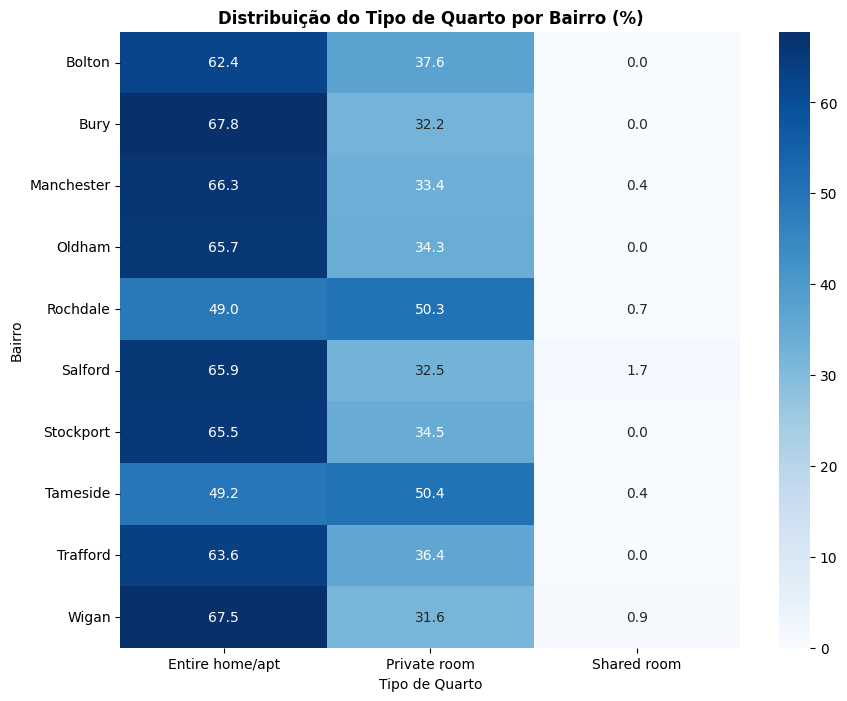

In [109]:
plt.figure(figsize= (10,8))
room_borough = pd.crosstab(df_analysis_normalizado['neighbourhood_group'], df_analysis_normalizado['room_type'])
room_borough_pct = room_borough.div(room_borough.sum(axis=1), axis=0) * 100
sns.heatmap(room_borough_pct, annot=True, cmap='Blues', fmt='.1f')
plt.title('Distribuição do Tipo de Quarto por Bairro (%)', fontweight='bold')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Bairro')
plt.show()

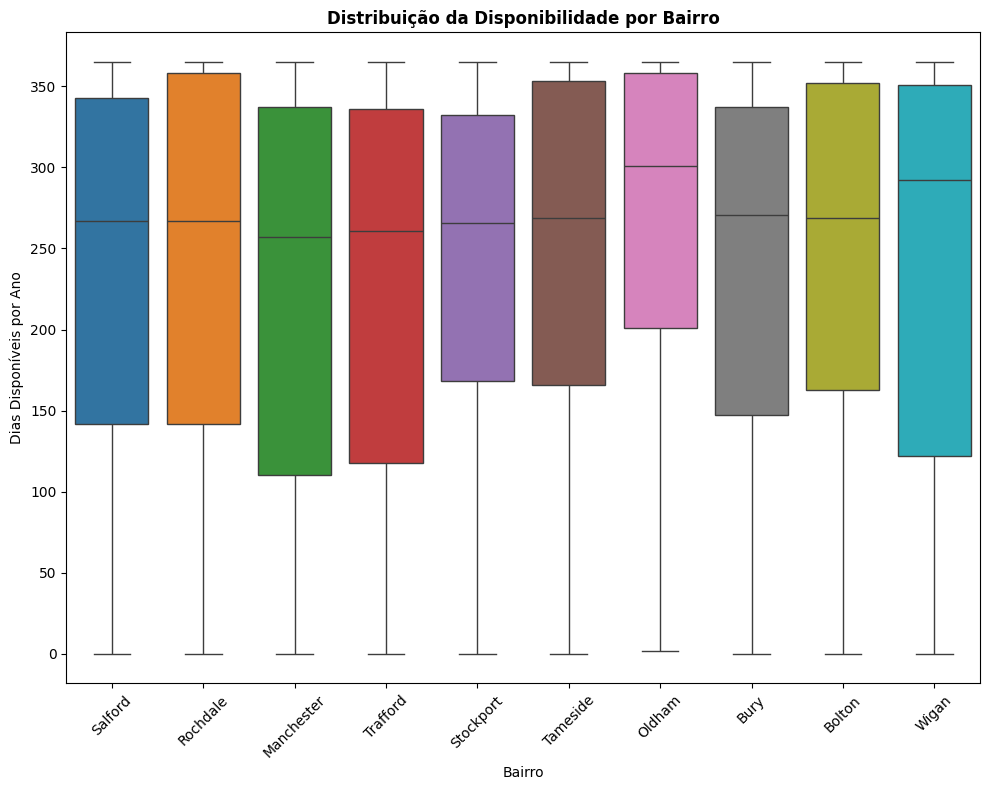

In [114]:
plt.figure(figsize= (10,8))
sns.boxplot(data=df_analysis_normalizado, x='neighbourhood_group', y='availability_365', hue='neighbourhood_group')
plt.title('Distribuição da Disponibilidade por Bairro', fontweight='bold')
plt.xlabel('Bairro')
plt.ylabel('Dias Disponíveis por Ano')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###

# Conslusões

In [123]:
def gerar_conclusao(df):


    print("Principais conclusões de Negócio:")
    print("=" * 50)

    # Insights de preços
    preco_mediano = df['price'].median()
    bairro_mais_caro = df.groupby('neighbourhood_group')['price'].mean().idxmax()
    bairro_mais_barato = df.groupby('neighbourhood_group')['price'].mean().idxmin()

    print(f"\nPREÇOS:")
    print(f"   • Preço mediano dos anúncios: €{preco_mediano:.2f}")
    print(f"   • Bairro mais caro: {bairro_mais_caro}")
    print(f"   • Bairro mais acessível: {bairro_mais_barato}")

    # Insights sobre tipos de quarto
    tipo_quarto_popular = df['room_type'].value_counts().index[0]
    print(f"\nSOBRE TIPOS DE QUARTO:")
    print(f"   • Tipo de quarto mais popular: {tipo_quarto_popular}")
    print(f"   • Distribuição dos tipos de quarto:")
    for tipo_quarto, count in df['room_type'].value_counts().items():
        percentual = (count / len(df)) * 100
        print(f"     - {tipo_quarto}: {count:,} anúncios ({percentual:.1f}%)")

    # Insights sobre anfitriões
    superhosts = df[df['calculated_host_listings_count'] >= 10]
    print(f"\n OBRE ANFITRIÕES:")
    print(f"   • Superhosts (10+ anúncios): {len(superhosts):,} ({len(superhosts)/len(df)*100:.1f}%)")
    print(f"   • Média de anúncios por anfitrião: {df['calculated_host_listings_count'].mean():.1f}")

    # Insights geográficos
    bairro_mais_anuncios = df['neighbourhood_group'].value_counts().index[0]
    print(f"\n GEOGRÁFICOS:")
    print(f"   • Bairro com mais anúncios: {bairro_mais_anuncios}")
    print(f"   • Distribuição por bairro:")
    for bairro, count in df['neighbourhood_group'].value_counts().items():
        percentual = (count / len(df)) * 100
        print(f"     - {bairro}: {count:,} anúncios ({percentual:.1f}%)")

    # Insights de disponibilidade
    alta_disponibilidade = df[df['availability_365'] > 300]
    print(f"\n SOBRE DISPONIBILIDADE:")
    print(f"   • Anúncios com alta disponibilidade (300+ dias): {len(alta_disponibilidade):,} ({len(alta_disponibilidade)/len(df)*100:.1f}%)")
    print(f"   • Disponibilidade média: {df['availability_365'].mean():.0f} dias por ano")


In [124]:
gerar_conclusao(df_analysis_normalizado)

Principais conclusões de Negócio:

PREÇOS:
   • Preço mediano dos anúncios: €80.00
   • Bairro mais caro: Manchester
   • Bairro mais acessível: Tameside

SOBRE TIPOS DE QUARTO:
   • Tipo de quarto mais popular: Entire home/apt
   • Distribuição dos tipos de quarto:
     - Entire home/apt: 3,979 anúncios (64.8%)
     - Private room: 2,131 anúncios (34.7%)
     - Shared room: 34 anúncios (0.6%)

 OBRE ANFITRIÕES:
   • Superhosts (10+ anúncios): 1,322 (21.5%)
   • Média de anúncios por anfitrião: 8.3

 GEOGRÁFICOS:
   • Bairro com mais anúncios: Manchester
   • Distribuição por bairro:
     - Manchester: 2,747 anúncios (44.7%)
     - Salford: 1,211 anúncios (19.7%)
     - Trafford: 582 anúncios (9.5%)
     - Stockport: 348 anúncios (5.7%)
     - Oldham: 245 anúncios (4.0%)
     - Tameside: 236 anúncios (3.8%)
     - Wigan: 231 anúncios (3.8%)
     - Bolton: 221 anúncios (3.6%)
     - Bury: 180 anúncios (2.9%)
     - Rochdale: 143 anúncios (2.3%)

 SOBRE DISPONIBILIDADE:
   • Anúncios com